In [1]:
%%html
<style>
table {align:left;display:block}
</style>

In [2]:
from papyrus_scripts.download import download_papyrus


In [3]:
download_papyrus(version='latest', structures=True, descriptors=['mold2', 'unirep'])

Latest version: 05.7
########## DISCLAIMER ##########
You are downloading the high-quality Papyrus++ dataset.
Should you want to access the entire, though of lower quality, Papyrus dataset,
look into additional switches of this command.
################################
Number of files to be downloaded: 7
Total size: 2.26GB


In [4]:
from papyrus_scripts.reader import read_papyrus, read_protein_set

In [5]:
from papyrus_scripts.preprocess import (keep_quality, keep_source, keep_type,
                                        keep_organism, keep_accession, keep_protein_class,
                                        keep_match, keep_contains
                                       )

In [6]:
protein_data = read_protein_set(source_path=None)
protein_data.head()

,target_id,UniProtID,Status,Organism,Classification,Length,Sequence,TID
0,P47747_WT,HRH2_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,359,MAFNGTVPSFCMDFTVYKVTISVILIILILVTVAGNVVVCLAVGLN...,ChEMBL:CHEMBL2882
1,B0FL73_WT,B0FL73_CAVPO,unreviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,467,MGAGVLALGASEPCNLSSTAPLPDGAATAARLLVPASPPASLLPPT...,ChEMBL:CHEMBL5471
2,Q8K4Z4_WT,ADRB2_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,418,MGHLGNGSDFLLAPNASHAPDHNVTRERDEAWVVGMAIVMSLIVLA...,ChEMBL:CHEMBL5414
3,P97266_WT,OPRM_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,98,YTKMKTATNIYIFNLALADALATSTLPFQSVNYLMGTWPFGTILCK...,ChEMBL:CHEMBL4354;ChEMBL:CHEMBL2111465
4,P41144_WT,OPRK_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,380,MGRRRQGPAQPASELPARNACLLPNGSAWLPGWAEPDGNGSAGPQD...,ChEMBL:CHEMBL3952;ChEMBL:CHEMBL2111465


In [7]:
sample_data = read_papyrus(is3d=False, plusplus= True, source_path='/home/s2861704/ppk/papyrus_data')
protein_data = read_protein_set(source_path=None)

In [8]:
filter1_it = keep_quality(data=sample_data, min_quality='high')
filter2_it = keep_protein_class(data=filter1_it, protein_data=protein_data, classes=[{'l2': 'Kinase'}])
# filter3_it = keep_type(data=filter2_it, activity_types=['Ki', 'KD'])
filter4_it = keep_organism(data=filter2_it, protein_data=protein_data, organism=['Human'], generic_regex=True)
filter5_it = keep_source(data=filter4_it, source=['ChEMBL34', 'Sharma2016'])
#filter6_it = keep_source(data=filter4_it, source=['Christmann2016'])

In [9]:
## protein classes:
# l2: Kinase
# l3: Protein Kinase
# l4: [CMGC / AGC / Other / STE / CAMK / TK / Atypical / TKL / CK1] protein kinase group
# l5: family
# l6: subfamily
# LINK: https://static-content.springer.com/esm/art%3A10.1186%2Fs13321-022-00672-x/MediaObjects/13321_2022_672_MOESM3_ESM.html

In [10]:
sample_data.head()
protein_data.head()

,target_id,UniProtID,Status,Organism,Classification,Length,Sequence,TID
0,P47747_WT,HRH2_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,359,MAFNGTVPSFCMDFTVYKVTISVILIILILVTVAGNVVVCLAVGLN...,ChEMBL:CHEMBL2882
1,B0FL73_WT,B0FL73_CAVPO,unreviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,467,MGAGVLALGASEPCNLSSTAPLPDGAATAARLLVPASPPASLLPPT...,ChEMBL:CHEMBL5471
2,Q8K4Z4_WT,ADRB2_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,418,MGHLGNGSDFLLAPNASHAPDHNVTRERDEAWVVGMAIVMSLIVLA...,ChEMBL:CHEMBL5414
3,P97266_WT,OPRM_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,98,YTKMKTATNIYIFNLALADALATSTLPFQSVNYLMGTWPFGTILCK...,ChEMBL:CHEMBL4354;ChEMBL:CHEMBL2111465
4,P41144_WT,OPRK_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,380,MGRRRQGPAQPASELPARNACLLPNGSAWLPGWAEPDGNGSAGPQD...,ChEMBL:CHEMBL3952;ChEMBL:CHEMBL2111465


In [11]:
#from papyrus_scripts.preprocess import consume_chunks

In [12]:
#filtered_data = consume_chunks(filter4_it, progress=True, total=60)
filtered_data = filter5_it

In [13]:
print(f'Number of activity points: {filtered_data.shape[0]}')

Number of activity points: 102444


In [14]:
print(len(filtered_data['source']))
print(len(filtered_data['source'].unique()))
print(filtered_data.columns)
print(filtered_data['doc_id'])

102444
2
Index(['Activity_ID', 'Quality', 'source', 'CID', 'SMILES', 'connectivity',
       'InChIKey', 'InChI', 'InChI_AuxInfo', 'target_id', 'TID', 'accession',
       'Protein_Type', 'AID', 'doc_id', 'Year', 'all_doc_ids', 'all_years',
       'type_IC50', 'type_EC50', 'type_KD', 'type_Ki', 'type_other',
       'Activity_class', 'relation', 'pchembl_value', 'pchembl_value_Mean',
       'pchembl_value_StdDev', 'pchembl_value_SEM', 'pchembl_value_N',
       'pchembl_value_Median', 'pchembl_value_MAD', 'Classification',
       'Organism'],
      dtype='object')
0                  PMID:15715478
1                  PMID:15715478
2                  PMID:28774425
3          PATENT:WO2014134388A1
4                   PMID:8151612
                   ...          
221185             PMID:23746475
221186             PMID:23746475
221187     PATENT:WO2014177060A1
221188        PATENT:US8772305B2
221189    PATENT:US20140309185A1
Name: doc_id, Length: 102444, dtype: object


In [15]:
#filtered_data['source'].unique()
print(len(filtered_data[filtered_data['source']=='Christmann2016']))
print(len(filtered_data[filtered_data['source']!='Christmann2016']))
print(len(filtered_data))

0
102444
102444


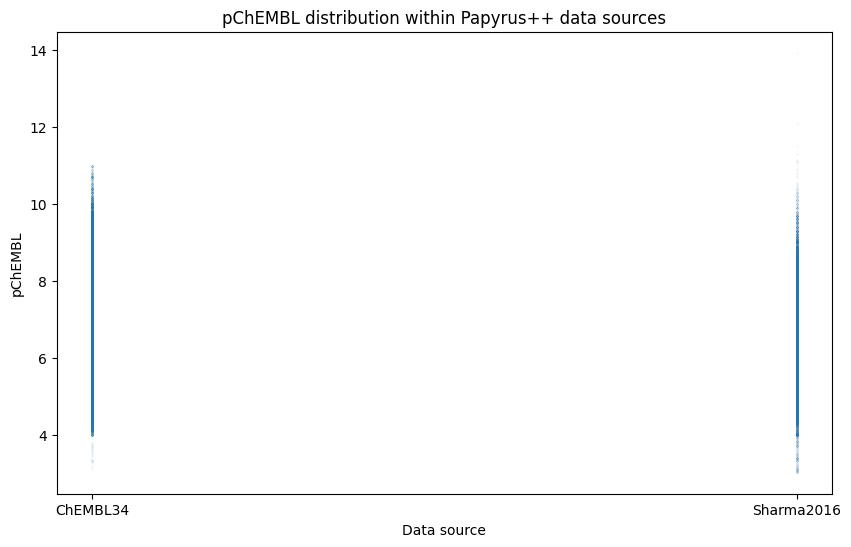

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data.plot(kind = 'scatter', x = 'source', y = 'pchembl_value_Mean', s=0.001, figsize=(10,6))
#plt.ylim(4,6)
plt.xlabel('Data source')
plt.ylabel('pChEMBL')
plt.title('pChEMBL distribution within Papyrus++ data sources')
#plt.savefig('PapyrusKinDist-CM2-rangemin.png')
plt.show()

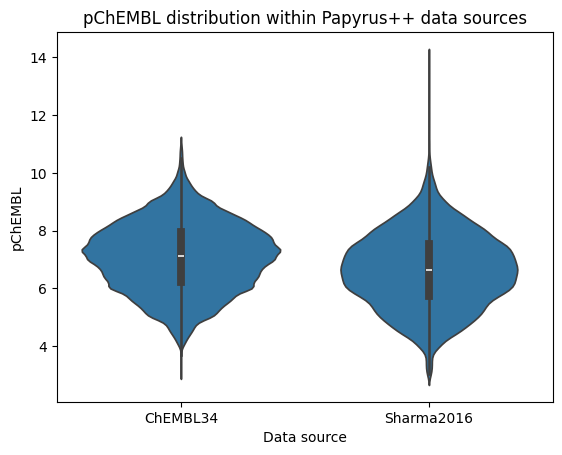

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load example dataset
dpdf = filtered_data

# create violin plot for height (horizontal)
sns.violinplot(data=dpdf, x="source", y="pchembl_value_Mean")
#plt.ylim(4,6)
plt.xlabel('Data source')
plt.ylabel('pChEMBL')
plt.title('pChEMBL distribution within Papyrus++ data sources')
#plt.savefig('PapyrusKinDist-CM2-violin-zoom.png') 
plt.show()

In [18]:
backup = filtered_data
singletask_data = filtered_data
multitask_data = filtered_data

In [19]:
##REGRESSION MODEL

In [20]:
from qsprpred.data import QSPRDataset
import os

os.makedirs("tutorial_output_draft/data", exist_ok=True)

dataset_st = QSPRDataset(
    df=singletask_data,
    store_dir="tutorial_output_draft/data",
    name="QuickStartDataset",
    target_props=[{"name": "pchembl_value_Mean", "task": "REGRESSION"}],
    random_state=42,
    overwrite=True
)

dataset_st.getDF()

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification,Organism,QSPRID,pchembl_value_Mean_original
QSPRID,,,,,,,,,,,,,,,,,,,,,
QuickStartDataset_000000,AAAAZQPHATYWOK_on_P00533_WT,High,ChEMBL34,ChEMBL:CHEMBL175513;Sharma2016.compound.4277046,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4nc5ccccc5s4)c(Cl)...,AAAAZQPHATYWOK,AAAAZQPHATYWOK-UHFFFAOYSA-N,InChI=1S/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-...,"AuxInfo=1/1/N:1,42,43,2,24,25,39,23,26,38,15,1...",P00533_WT,...,6.728000,0.002828,0.002000,2.0,6.728,0.002,Enzyme->Kinase->Protein Kinase->TK protein kin...,Homo sapiens (Human),QuickStartDataset_000000,6.728000
QuickStartDataset_000001,AAAAZQPHATYWOK_on_P04626_WT,High,ChEMBL34,ChEMBL:CHEMBL175513,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4nc5ccccc5s4)c(Cl)...,AAAAZQPHATYWOK,AAAAZQPHATYWOK-UHFFFAOYSA-N,InChI=1S/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-...,"AuxInfo=1/1/N:1,42,43,2,24,25,39,23,26,38,15,1...",P04626_WT,...,7.190000,0.000000,0.000000,1.0,7.190,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...,Homo sapiens (Human),QuickStartDataset_000001,7.190000
QuickStartDataset_000002,AAACBXVBBDAYRQ_on_Q5S007_WT,High,ChEMBL34,ChEMBL:CHEMBL4067228,O=C(Nc1cccnc1)c1cc(Cl)ccc1OCc1ccccc1,AAACBXVBBDAYRQ,AAACBXVBBDAYRQ-UHFFFAOYSA-N,InChI=1S/C19H15ClN2O2/c20-15-8-9-18(24-13-14-5...,"AuxInfo=1/1/N:22,21,23,6,20,24,5,14,15,7,11,9,...",Q5S007_WT,...,7.800000,0.000000,0.000000,1.0,7.800,0.000,Enzyme->Kinase->Protein Kinase->TKL protein ki...,Homo sapiens (Human),QuickStartDataset_000002,7.800000
QuickStartDataset_000003,AAACGYYPWMUUFL_on_O75116_WT,High,Sharma2016,Sharma2016.compound.10060010,COC(=O)CC(NC(=O)c1ccc(-c2cn[nH]c2)c(C)c1)c1ccccc1,AAACGYYPWMUUFL,AAACGYYPWMUUFL-UHFFFAOYSA-N,InChI=1S/C21H21N3O3/c1-14-10-16(8-9-18(14)17-1...,"AuxInfo=1/1/N:20,1,25,24,26,23,27,11,12,21,5,1...",O75116_WT,...,7.154000,0.000000,0.000000,1.0,7.154,0.000,Enzyme->Kinase->Protein Kinase->AGC protein ki...,Homo sapiens (Human),QuickStartDataset_000003,7.154000
QuickStartDataset_000004,AAALVYBICLMAMA_on_P00533_WT,High,Sharma2016,Sharma2016.compound.2022,O=C1NC(=O)c2cc(Nc3ccccc3)c(Nc3ccccc3)cc21,AAALVYBICLMAMA,AAALVYBICLMAMA-UHFFFAOYSA-N,InChI=1S/C20H15N3O2/c24-19-15-11-17(21-13-7-3-...,"AuxInfo=1/1/N:13,21,12,14,20,22,11,15,19,23,7,...",P00533_WT,...,5.157667,0.205576,0.118689,3.0,5.187,0.160,Enzyme->Kinase->Protein Kinase->TK protein kin...,Homo sapiens (Human),QuickStartDataset_000004,5.157667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QuickStartDataset_102439,ZZZJRULMCGMYRH_on_Q15759_WT,High,ChEMBL34,ChEMBL:CHEMBL2401979,Cc1ccc(C(=O)NC2CC2)cc1NC(=O)c1cnn(-c2ncccc2C(F...,ZZZJRULMCGMYRH,ZZZJRULMCGMYRH-UHFFFAOYSA-N,InChI=1S/C22H20F3N5O2/c1-12-5-6-14(20(31)28-15...,"AuxInfo=1/1/N:1,32,24,25,3,4,10,11,23,12,18,2,...",Q15759_WT,...,8.336667,0.109697,0.063333,3.0,8.400,0.000,Enzyme->Kinase->Protein Kinase->CMGC protein k...,Homo sapiens (Human),QuickStartDataset_102439,8.336667
QuickStartDataset_102440,ZZZJRULMCGMYRH_on_Q16539_WT,High,ChEMBL34,ChEMBL:CHEMBL2401979,Cc1ccc(C(=O)NC2CC2)cc1NC(=O)c1cnn(-c2ncccc2C(F...,ZZZJRULMCGMYRH,ZZZJRULMCGMYRH-UHFFFAOYSA-N,InChI=1S/C22H20F3N5O2/c1-12-5-6-14(20(31)28-15...,"AuxInfo=1/1/N:1,32,24,25,3,4,10,11,23,12,18,2,...",Q16539_WT,...,8.426667,0.046188,0.026667,3.0,8.400,0.000,Enzyme->Kinase->Protein Kinase->CMGC protein k...,Homo sapiens (Human),QuickStartDataset_102440,8.426667
QuickStartDataset_102441,ZZZLBPFCYOBPQV_on_Q12852_WT,High,ChEMBL34,ChEMBL:CHEMBL3729456,CC1(F)CCN(c2nc(-c3cnc(N)nc3)cc(N3CC4CC3CO4)n2)C1,ZZZLBPFCYOBPQV,ZZZLBPFCYOBPQV-UHFFFAOYSA-N,InChI=1S/C18H22FN7O/c1-18(19)2-3-25(10-18)17-2...,"AuxInfo=1/1/N:1,4,5,22,17,11,16,20,24,27,10,23...",Q12852_WT,...,7.300000,0.494975,0.350000,2.0,7.300,0.350,Enzyme->Kinase->Protein Kinase->STE protein ki...,Homo sapiens (Human),QuickStartDataset_102441,7.300000


In [21]:
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data import RandomSplit

# Specifiy random split for creating the train (80%) and test set (20%)
rand_split = RandomSplit(test_fraction=0.2, dataset=dataset_st)
## Alt splits: ScaffoldSplit(/ter), TemporalSplit/StratisfiedSplitter, ManualSplit, BootstrapSplit,
## GMBTDataSplit: GBMTRandomSplit, ClusterSplit
# calculate compound features and split dataset into train and test
dataset_st.prepareDataset(
    split=rand_split,
    feature_calculators=[MorganFP(radius=3, nBits=2048)],
)

print(f"Number of samples in train set: {len(dataset_st.y)}")
print(f"Number of samples in test set: {len(dataset_st.y_ind)}")

dataset_st.save()

Number of samples in train set: 81955
Number of samples in test set: 20489


In [22]:
from qsprpred.models import SklearnModel
from sklearn.neighbors import KNeighborsRegressor
from qsprpred.models import CrossValAssessor, TestSetAssessor

os.makedirs("tutorial_output_draft/models", exist_ok=True)

# This is an SKlearn model, so we will initialize it with the SklearnModel class
stmodel = SklearnModel(
    base_dir="tutorial_output_draft/models",
    alg=KNeighborsRegressor,
    name="QuickStartModel"
)

# We can now assess the model performance on the training set using cross validation
CrossValAssessor("r2")(stmodel, dataset_st)

# and on the test set
TestSetAssessor("r2")(stmodel, dataset_st)

# Finally, we need to fit the model on the complete dataset if we want to use it further
# This will save the fitted model and metadata to disk
stmodel.fitDataset(dataset_st)

# We can optionally save the model and metadata to disk explicitly as well
_ = stmodel.save()

QuickStartModel


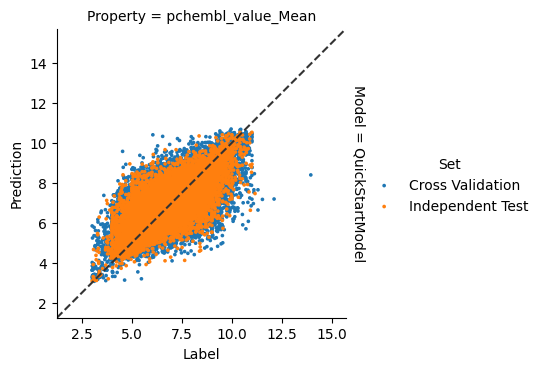

<Figure size 640x480 with 0 Axes>

In [23]:
from qsprpred.plotting.regression import CorrelationPlot

stplot = CorrelationPlot([stmodel])
axes, summary = stplot.make(save=True, show=True)

In [24]:
summary

,Model,Fold,Property,R2,RMSE,Set
0,QuickStartModel,0.0,pchembl_value_Mean,0.553608,0.815772,Cross Validation
1,QuickStartModel,1.0,pchembl_value_Mean,0.555670,0.817364,Cross Validation
2,QuickStartModel,2.0,pchembl_value_Mean,0.551515,0.818145,Cross Validation
3,QuickStartModel,3.0,pchembl_value_Mean,0.558866,0.808032,Cross Validation
4,QuickStartModel,4.0,pchembl_value_Mean,0.557028,0.817488,Cross Validation
5,QuickStartModel,Independent Test,pchembl_value_Mean,0.559211,0.808650,Independent Test


In [25]:
##PREDICT FOR SMILES INPUT
#smiles_list = ["c1(cc(c(O)cc1)O)CCN", "CC(=O)OC1=CC=CC=C1C(=O)O",
#               "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"]

#model.predictMols(smiles_list)

In [26]:
##RELOAD REGRESSION MODEL
#dataset = QSPRDataset.fromFile(
#    "./tutorial_output/data/QuickStartDataset/QuickStartDataset_meta.json")
#model = SklearnModel.fromFile(
#    "./tutorial_output/models/QuickStartModel/QuickStartModel_meta.json")
## or
#dataset = QSPRDataset(
#    name="QuickStartDataset",
#    store_dir="./tutorial_output/data/",
#)
#model = SklearnModel(
#    name="QuickStartModel",
#    base_dir="./tutorial_output/models/"
#)

In [27]:
## MULTITASK REGRESSION MODEL

In [61]:
import os

import pandas as pd

# load the data
mtdf = multitask_data

display(mtdf.head())

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification,Organism,QSPRID,pchembl_value_Mean_original,Split_IsTrain
QSPRID,,,,,,,,,,,,,,,,,,,,,
QuickStartDataset_000000,AAAAZQPHATYWOK_on_P00533_WT,High,ChEMBL34,ChEMBL:CHEMBL175513;Sharma2016.compound.4277046,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4nc5ccccc5s4)c(Cl)...,AAAAZQPHATYWOK,AAAAZQPHATYWOK-UHFFFAOYSA-N,InChI=1S/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-...,"AuxInfo=1/1/N:1,42,43,2,24,25,39,23,26,38,15,1...",P00533_WT,...,0.002828,0.002000,2.0,6.728,0.002,Enzyme->Kinase->Protein Kinase->TK protein kin...,Homo sapiens (Human),QuickStartDataset_000000,6.728000,True
QuickStartDataset_000001,AAAAZQPHATYWOK_on_P04626_WT,High,ChEMBL34,ChEMBL:CHEMBL175513,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4nc5ccccc5s4)c(Cl)...,AAAAZQPHATYWOK,AAAAZQPHATYWOK-UHFFFAOYSA-N,InChI=1S/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-...,"AuxInfo=1/1/N:1,42,43,2,24,25,39,23,26,38,15,1...",P04626_WT,...,0.000000,0.000000,1.0,7.190,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...,Homo sapiens (Human),QuickStartDataset_000001,7.190000,True
QuickStartDataset_000002,AAACBXVBBDAYRQ_on_Q5S007_WT,High,ChEMBL34,ChEMBL:CHEMBL4067228,O=C(Nc1cccnc1)c1cc(Cl)ccc1OCc1ccccc1,AAACBXVBBDAYRQ,AAACBXVBBDAYRQ-UHFFFAOYSA-N,InChI=1S/C19H15ClN2O2/c20-15-8-9-18(24-13-14-5...,"AuxInfo=1/1/N:22,21,23,6,20,24,5,14,15,7,11,9,...",Q5S007_WT,...,0.000000,0.000000,1.0,7.800,0.000,Enzyme->Kinase->Protein Kinase->TKL protein ki...,Homo sapiens (Human),QuickStartDataset_000002,7.800000,True
QuickStartDataset_000003,AAACGYYPWMUUFL_on_O75116_WT,High,Sharma2016,Sharma2016.compound.10060010,COC(=O)CC(NC(=O)c1ccc(-c2cn[nH]c2)c(C)c1)c1ccccc1,AAACGYYPWMUUFL,AAACGYYPWMUUFL-UHFFFAOYSA-N,InChI=1S/C21H21N3O3/c1-14-10-16(8-9-18(14)17-1...,"AuxInfo=1/1/N:20,1,25,24,26,23,27,11,12,21,5,1...",O75116_WT,...,0.000000,0.000000,1.0,7.154,0.000,Enzyme->Kinase->Protein Kinase->AGC protein ki...,Homo sapiens (Human),QuickStartDataset_000003,7.154000,True
QuickStartDataset_000004,AAALVYBICLMAMA_on_P00533_WT,High,Sharma2016,Sharma2016.compound.2022,O=C1NC(=O)c2cc(Nc3ccccc3)c(Nc3ccccc3)cc21,AAALVYBICLMAMA,AAALVYBICLMAMA-UHFFFAOYSA-N,InChI=1S/C20H15N3O2/c24-19-15-11-17(21-13-7-3-...,"AuxInfo=1/1/N:13,21,12,14,20,22,11,15,19,23,7,...",P00533_WT,...,0.205576,0.118689,3.0,5.187,0.160,Enzyme->Kinase->Protein Kinase->TK protein kin...,Homo sapiens (Human),QuickStartDataset_000004,5.157667,True


In [62]:
# pivot the dataframe to have the accession as columns
mtdf = mtdf.pivot_table(index="SMILES", columns="accession", values="pchembl_value_Mean")
#df.columns.name = None
mtdf.reset_index(inplace=True)
print(mtdf.columns)

display(mtdf.head())
#Teams message + delete smiles

Index(['SMILES', 'O00141', 'O00238', 'O00311', 'O00418', 'O00444', 'O00506',
       'O14578', 'O14730', 'O14733',
       ...
       'Q9Y463', 'Q9Y478', 'Q9Y4K4', 'Q9Y572', 'Q9Y5S2', 'Q9Y616', 'Q9Y6E0',
       'Q9Y6K9', 'Q9Y6M4', 'Q9Y6R4'],
      dtype='object', name='accession', length=407)


accession,SMILES,O00141,O00238,O00311,O00418,O00444,O00506,O14578,O14730,O14733,...,Q9Y463,Q9Y478,Q9Y4K4,Q9Y572,Q9Y5S2,Q9Y616,Q9Y6E0,Q9Y6K9,Q9Y6M4,Q9Y6R4
0,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brc1c(Br)c(Br)c2[nH]cnc2c1Br,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brc1c(Br)c(Br)c2[nH]nnc2c1Br,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
column_list = list(mtdf.columns)
print (column_list)

['SMILES', 'O00141', 'O00238', 'O00311', 'O00418', 'O00444', 'O00506', 'O14578', 'O14730', 'O14733', 'O14757', 'O14920', 'O14965', 'O14976', 'O15075', 'O15111', 'O15146', 'O15264', 'O15530', 'O43283', 'O43293', 'O43318', 'O43353', 'O43683', 'O43741', 'O43781', 'O60285', 'O60674', 'O75116', 'O75385', 'O75582', 'O75676', 'O75716', 'O75914', 'O76039', 'O94768', 'O94804', 'O94806', 'O94921', 'O95382', 'O95819', 'O95835', 'O96013', 'O96017', 'P00519', 'P00533', 'P04049', 'P04626', 'P04629', 'P05129', 'P05771', 'P06213', 'P06239', 'P06241', 'P06493', 'P07332', 'P07333', 'P07947', 'P07948', 'P07949', 'P08069', 'P08581', 'P08631', 'P08922', 'P09619', 'P09769', 'P0C1S8', 'P10398', 'P10721', 'P11309', 'P11362', 'P11802', 'P12931', 'P13861', 'P14616', 'P15056', 'P15735', 'P16234', 'P16591', 'P17252', 'P17612', 'P17948', 'P19525', 'P19784', 'P20794', 'P21127', 'P21709', 'P21802', 'P21860', 'P22455', 'P22607', 'P22612', 'P22674', 'P22694', 'P23443', 'P23458', 'P24723', 'P24941', 'P25098', 'P27037',

In [64]:
del column_list[0:1]
print(column_list)

['O00141', 'O00238', 'O00311', 'O00418', 'O00444', 'O00506', 'O14578', 'O14730', 'O14733', 'O14757', 'O14920', 'O14965', 'O14976', 'O15075', 'O15111', 'O15146', 'O15264', 'O15530', 'O43283', 'O43293', 'O43318', 'O43353', 'O43683', 'O43741', 'O43781', 'O60285', 'O60674', 'O75116', 'O75385', 'O75582', 'O75676', 'O75716', 'O75914', 'O76039', 'O94768', 'O94804', 'O94806', 'O94921', 'O95382', 'O95819', 'O95835', 'O96013', 'O96017', 'P00519', 'P00533', 'P04049', 'P04626', 'P04629', 'P05129', 'P05771', 'P06213', 'P06239', 'P06241', 'P06493', 'P07332', 'P07333', 'P07947', 'P07948', 'P07949', 'P08069', 'P08581', 'P08631', 'P08922', 'P09619', 'P09769', 'P0C1S8', 'P10398', 'P10721', 'P11309', 'P11362', 'P11802', 'P12931', 'P13861', 'P14616', 'P15056', 'P15735', 'P16234', 'P16591', 'P17252', 'P17612', 'P17948', 'P19525', 'P19784', 'P20794', 'P21127', 'P21709', 'P21802', 'P21860', 'P22455', 'P22607', 'P22612', 'P22674', 'P22694', 'P23443', 'P23458', 'P24723', 'P24941', 'P25098', 'P27037', 'P27361',

In [65]:
from qsprpred.data import QSPRDataset
from sklearn.impute import SimpleImputer

target_props = []
for target in column_list:
    target_props.append({'name': target, 'task': "REGRESSION", "imputer": SimpleImputer(strategy="mean")})

In [66]:
print(target_props)

[{'name': 'O00141', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O00238', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O00311', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O00418', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O00444', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O00506', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O14578', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O14730', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O14733', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O14757', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O14920', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O14965', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O14976', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O15075', 'task': 'REGRESSION', 'imputer': SimpleImputer()}, {'name': 'O15111', 

In [67]:
dataset_mt = QSPRDataset(
    name="MultiTaskTutorialDataset",
    df=mtdf,
    target_props=target_props,
    store_dir="../../tutorial_output_draft_mt/data",
    random_state=42,
    drop_empty=False,
)

dataset_mt.getDF()

qsprpred - WARNING - Existing data set found, but also found a data frame in store. Refusing to overwrite data. If you want to overwrite data in store, set overwrite=True.
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:502: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[names_old] = self.df[names]
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:502: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[names_old] = self.df

accession,SMILES,O00141,O00238,O00311,O00418,O00444,O00506,O14578,O14730,O14733,...,Q9Y463_before_impute,Q9Y478_before_impute,Q9Y4K4_before_impute,Q9Y572_before_impute,Q9Y5S2_before_impute,Q9Y616_before_impute,Q9Y6E0_before_impute,Q9Y6K9_before_impute,Q9Y6M4_before_impute,Q9Y6R4_before_impute
QSPRID,,,,,,,,,,,,,,,,,,,,,
MultiTaskTutorialDataset_00000,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,7.448973,6.771905,7.487884,5.014865,7.724307,6.173723,6.015579,6.197579,5.454357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiTaskTutorialDataset_00001,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1,7.448973,6.771905,7.487884,5.014865,7.724307,6.173723,6.015579,6.197579,5.454357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiTaskTutorialDataset_00002,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,7.448973,6.771905,7.487884,5.014865,7.724307,6.173723,6.015579,6.197579,5.454357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiTaskTutorialDataset_00003,Brc1c(Br)c(Br)c2[nH]cnc2c1Br,7.448973,6.771905,7.487884,5.014865,7.724307,6.173723,6.015579,6.197579,5.454357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiTaskTutorialDataset_00004,Brc1c(Br)c(Br)c2[nH]nnc2c1Br,7.448973,6.771905,7.487884,5.014865,7.724307,6.173723,6.015579,6.197579,5.454357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MultiTaskTutorialDataset_76223,c1ncc(-c2ccc3[nH]nc(-c4cc5c(N6CCCCC6)cncc5[nH]...,7.448973,6.771905,7.487884,5.014865,7.724307,6.173723,6.015579,6.197579,5.454357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiTaskTutorialDataset_76224,c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1,7.448973,6.771905,7.487884,5.014865,7.724307,6.173723,6.015579,6.197579,5.454357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiTaskTutorialDataset_76225,c1ncc(CNc2ccnc(-c3ccc4c(c3)OCO4)n2)cn1,7.448973,6.771905,7.487884,5.014865,7.724307,6.173723,6.015579,6.197579,5.454357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
from qsprpred.models import SklearnMetrics
from qsprpred.models import MaskedMetric
import numpy as np

r2_score = SklearnMetrics("r2")
masked_metric = MaskedMetric(metric=SklearnMetrics("r2"))

y_true = np.array([1.0, 1.1, None, 1.3, 1.4, 1.5, 1.6, None, 1.8, 1.9], dtype=float)
y_pred = np.array([0.9, 1.0, 3.2, 1.1, 1.2, 1.2, 1.7, 1.5, 1.5, 2.1], dtype=float)

# Default behavior
try:
    r2_score(y_true, y_pred)
except ValueError as e:
    print(f"Missing values are not supported by default: {e}")

# Masked behavior: skip the masked values
masked_metric(y_true, y_pred)

Missing values are not supported by default: Input contains NaN.


0.5285714285714285

In [69]:
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data import RandomSplit

# calculate compound features and split dataset into train and test
dataset_mt.prepareDataset(
    split=RandomSplit(test_fraction=0.2, dataset=dataset_mt),
    feature_calculators=[MorganFP(radius=3, nBits=2048)]
)

print(f"Number of samples train set: {len(dataset_mt.y)}")
print(f"Number of samples test set: {len(dataset_mt.y_ind)}")

dataset_mt.save()

Number of samples train set: 60982
Number of samples test set: 15246


In [70]:
from qsprpred.models import SklearnModel
from sklearn.neighbors import KNeighborsRegressor
from qsprpred.models import CrossValAssessor, TestSetAssessor

os.makedirs('../../tutorial_output_draft_mt/models', exist_ok=True)

# This is an SKlearn model, so we will initialize it with the SklearnModel class
mtmodel = SklearnModel(
    base_dir='../../tutorial_output_draft_mt/models',
    alg=KNeighborsRegressor,
    name='MultiTaskTutorialModel')

CrossValAssessor('r2', split_multitask_scores=True)(mtmodel, dataset_mt)
TestSetAssessor('r2')(mtmodel, dataset_mt)

# Finally, we need to fit the model on the complete dataset if we want to use it further
mtmodel.fitDataset(dataset_mt)

# and save the model
_ = mtmodel.save()

qsprpred - WARNING - Random state supplied, but alg <class 'sklearn.neighbors._regression.KNeighborsRegressor'> does not support it. Ignoring this setting.
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/models/assessment/methods.py:125: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_out[f"{prop.name}_Prediction"] = predictions[:, idx]
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/models/assessment/methods.py:125: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_out[f"{

In [71]:
import pandas as pd
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
    mean_squared_error, r2_score

# get independent test set
mtdf = pd.read_table(
    "../../tutorial_output_draft_mt/models/MultiTaskTutorialModel/MultiTaskTutorialModel.ind.tsv")

# column names containing original labels or predictions for the tasks
label_names = [i for i in list(mtdf.columns.values) if "Label" in i]
pred_names = [i for i in list(mtdf.columns.values) if "Prediction" in i]

# turn into np array
ylabel = mtdf[label_names].to_numpy()
ypred = mtdf[pred_names].to_numpy()

# get metrics
summary = {}
for metric in [explained_variance_score, mean_absolute_error, mean_squared_error,
               r2_score]:
    score = metric(ylabel, ypred)
    summary[metric.__name__] = score

summary["MTModelName"] = mtmodel.name

summary

{'explained_variance_score': -9.576922260779797e+22,
 'mean_absolute_error': 0.002395334058388246,
 'mean_squared_error': 0.002125564738593826,
 'r2_score': -9.578260884592224e+22,
 'MTModelName': 'MultiTaskTutorialModel'}

In [72]:
from qsprpred.plotting.regression import CorrelationPlot

plot = CorrelationPlot([mtmodel])
axes, summary = plot.make(save=False, show=True)

KeyboardInterrupt: 

In [ ]:
summary

In [ ]:
##CLASSIFICATION MODEL

In [41]:
# https://github.com/CDDLeiden/QSPRpred/blob/main/tutorials/basics/modelling/classification.ipynb
# Discuss with Marc -> threshold & differences singletask and multitask
# Also: split for regression model